# **Text to XML**

In [ ]:
pip install spacy

In [ ]:
# Step 1: Import required libraries
import spacy
import xml.etree.ElementTree as ET
from google.colab import files

# Step 2: Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the SLA text file
with open("geminiSLA.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Step 4: Process the text using spaCy
doc = nlp(text)

# Step 5: Extract keywords (nouns and proper nouns, not stop words or punctuation)
keywords = {token.text.lower() for token in doc if token.pos_ in ("NOUN", "PROPN") and not token.is_stop and token.is_alpha}

# Step 6: Format the keywords line
keywords_line = 'keywords={ ' + ", ".join(f'"{kw}"' for kw in sorted(keywords)) + ' }'

# Step 7: Write formatted line to TXT file
output_filename = "Extracted_keywords.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    f.write(keywords_line)

# Step 8: Download the TXT file (for Colab users)
files.download(output_filename)

# Step 9: Print extracted keywords
print("Extracted keywords:")
print(keywords_line)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracted keywords:
keywords={ "access", "activities", "advance", "agreement", "amendment", "amendments", "anniversary", "appendix", "applications", "area", "availability", "b", "broadband", "capabilities", "capacity", "cards", "cell", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "core", "coverage", "cpe", "credit", "credits", "critical", "customer", "daily", "data", "date", "days", "definition", "degradation", "description", "device", "devices", "dispute", "disputes", "downlink", "effective", "effort", "egress", "email", "embb", "end", "enhanced", "enterprise", "equipment", "esim", "event", "f", "faith", "fee", "file", "frequency", "function", "functioning", "g", "gateway", "gateways", "gbps", "general", "geographic", "gigabits", "guaranteed", "high", "hourly", "hours", "id", "ids", "incident", "incidents", "industrial", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "latency", "level

In [ ]:
import re
import xml.etree.ElementTree as ET

# Load the text
with open("geminiSLA.txt", "r") as file:
    lines = file.readlines()

# Create root element for XML
root = ET.Element("requirements")

# Define basic patterns to match requirements
patterns = [
    (r"latency.*?(less than|under|<)\s*(\d+\.?\d*)\s*ms", "latency"),
    (r"availability.*?(\d+\.?\d*)\s*%", "availability"),
    (r"jitter.*?(up to|less than|<)\s*(\d+\.?\d*)\s*ms", "jitter")
]

# Process each line
for line in lines:
    print(f"Processing line: {line.strip()}")
    for pattern, req_type in patterns:
        match = re.search(pattern, line, re.IGNORECASE)
        if match:
            print(f" Matched {req_type}: {match.groupdict()}")
            req_elem = ET.SubElement(root, "requirement")
            ET.SubElement(req_elem, "type").text = req_type

            # Safely extract named groups
            value = match.groupdict().get("value")
            operator = match.groupdict().get("operator")

            if value:
                ET.SubElement(req_elem, "constraint").text = value
            else:
                print(" No 'value' group found for match:", match.group())

            if operator:
                req_elem.set("operator", operator)

# Save to XML
tree = ET.ElementTree(root)
tree.write("output.xml", encoding="utf-8", xml_declaration=True)

print(" XML generated as 'output.xml'")


Processing line: Service Level Agreement (SLA) - 5G Enhanced Mobile Broadband (eMBB) Service
Processing line: 
Processing line: Agreement ID: SLA-5G-eMBB-001-20250626
Processing line: Effective Date: 2025-07-01
Processing line: Service Provider: NexGen Telecom Inc.
Processing line: Customer: Enterprise Solutions Corp.
Processing line: Service Type: 5G Enhanced Mobile Broadband (eMBB) - High-Capacity Data Service
Processing line: 
Processing line: 1. Service Description
Processing line: 
Processing line: This SLA outlines the terms and conditions for the provision of a dedicated 5G Enhanced Mobile Broadband (eMBB) service to Enterprise Solutions Corp. This service is designed to deliver high-throughput, low-latency connectivity primarily for data-intensive applications, including but not limited to, cloud computing, high-definition video streaming, and large file transfers.
Processing line: 
Processing line: 2. Service Scope
Processing line: 
Processing line: Geographic Coverage: Primar

In [ ]:
for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Token: Service, POS: PROPN, Dependency: compound
Token: Level, POS: PROPN, Dependency: compound
Token: Agreement, POS: PROPN, Dependency: ROOT
Token: (, POS: PUNCT, Dependency: punct
Token: SLA, POS: PROPN, Dependency: appos
Token: ), POS: PUNCT, Dependency: punct
Token: -, POS: PUNCT, Dependency: punct
Token: 5, POS: NUM, Dependency: nummod
Token: G, POS: NOUN, Dependency: nmod
Token: Enhanced, POS: PROPN, Dependency: amod
Token: Mobile, POS: PROPN, Dependency: compound
Token: Broadband, POS: PROPN, Dependency: nmod
Token: (, POS: PUNCT, Dependency: punct
Token: eMBB, POS: PROPN, Dependency: nmod
Token: ), POS: PUNCT, Dependency: punct
Token: Service, POS: PROPN, Dependency: compound
Token: 

, POS: SPACE, Dependency: dep
Token: Agreement, POS: PROPN, Dependency: compound
Token: ID, POS: PROPN, Dependency: appos
Token: :, POS: PUNCT, Dependency: punct
Token: SLA-5G, POS: PROPN, Dependency: nmod
Token: -, POS: PUNCT, Dependency: punct
Token: eMBB-001, POS: NOUN, Dependency: nmod
Token:

In [ ]:
# First keyword set
keywords1 = {
   "availability", "db", "downlink", "environments", "hours", "jitter",
    "latency", "loss", "mbps", "milliseconds", "minutes", "mission", "network", "noise",
    "session", "setup", "signal", "streaming", "throughput", "time", "urllc", "reliability", "packet", "qos",
    "acceptance", "notifies", "Business Days", "requirements", "obligations", "agreement", "acme",
    "agreementid",  "coveragearea", "customer", "days", "deliverymethod", "edge",
    "effectivedate", "elements", "format", "frequency", "gbps", "general",
    "measurementperiod", "metrics", "mobile", "monitoring", "ms", "networks",
   "penalties", "performance", "priority", "provider",
   "recipient", "refund", "region", "release", "remedies", "renewal", "target", "termination",
   "terms", "threshold", "uplink", "usecases",
}

# Second keyword set
keywords2={ "access", "activities", "advance", "agreement",  "appendix", "applications", "area", "availability", "broadband", "capabilities", "capacity", "cards", "cell", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "core", "coverage", "cpe", "credit", "credits", "critical", "customer", "daily", "data", "date", "days", "definition", "degradation", "description", "device", "devices", "dispute", "disputes", "downlink", "effective", "effort", "egress", "email", "embb", "end", "enhanced", "enterprise", "equipment", "esim", "event", "fee", "file", "frequency", "function", "functioning", "gateway", "gateways", "gbps", "general", "gigabits", "guaranteed", "high", "hourly", "hours", "id", "ids", "incident", "incidents", "industrial", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "latency", "level", "levels", "loss", "low", "maintenance", "management", "maximum", "mbps", "measurement", "measurements", "medium", "metric", "metrics", "metropolitan", "milliseconds", "minimum", "minute", "mobile", "monitor", "month", "ms", "negotiation", "network", "nexgen", "notice", "notify", "objective", "objectives", "online", "outage", "packet", "parties", "party", "penalties", "percentage", "performance", "period", "phone", "plane", "pm", "point", "policy", "portal", "premises", "prioritization", "priority", "profiles", "provider", "provision", "rate", "region", "reporting", "reports", "requirements", "resolution", "respond", "responsibilities", "review", "scope", "segment", "service", "sim", "sla", "slices", "slos", "solutions", "specific", "status", "streaming", "subset", "support", "target", "telecom", "termination", "terms", "throughput", "time", "traffic", "transfers", "type", "updates", "uplink", "uptime", "usage", "user", "users", "video" }

# Merge sets without duplicates
merged_keywords = keywords1.union(keywords2)

# Create a sorted list of quoted keywords
keywords = sorted(f'"{kw}"' for kw in merged_keywords)

# Format the final string
output_string = "keywords={ " + ", ".join(keywords) + " }"

# Print in desired format
print("keywords={ " + ", ".join(keywords) + " }")

# Save to a .txt file
with open("merged_keywords.txt", "w", encoding="utf-8") as file:
    file.write(output_string)

print("Keywords saved to merged_keywords.txt")


keywords={ "Business Days", "acceptance", "access", "acme", "activities", "advance", "agreement", "agreementid", "appendix", "applications", "area", "availability", "broadband", "capabilities", "capacity", "cards", "cell", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "core", "coverage", "coveragearea", "cpe", "credit", "credits", "critical", "customer", "daily", "data", "date", "days", "db", "definition", "degradation", "deliverymethod", "description", "device", "devices", "dispute", "disputes", "downlink", "edge", "effective", "effectivedate", "effort", "egress", "elements", "email", "embb", "end", "enhanced", "enterprise", "environments", "equipment", "esim", "event", "fee", "file", "format", "frequency", "function", "functioning", "gateway", "gateways", "gbps", "general", "gigabits", "guaranteed", "high", "hourly", "hours", "id", "ids", "incident", "incidents", "industrial", "infrastructure", "ingress", "inquiries", "installation", "int

In [ ]:
keywords={ "Business Days", "acceptance", "access", "acme", "activities", "advance", "agreement", "agreementid", "appendix", "applications", "area", "availability", "broadband", "capabilities", "capacity", "cards", "cell", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "core", "coverage", "coveragearea", "cpe", "credit", "credits", "critical", "customer", "daily", "data", "date", "days", "db", "definition", "degradation", "deliverymethod", "description", "device", "devices", "dispute", "disputes", "downlink", "edge", "effective", "effectivedate", "effort", "egress", "elements", "email", "embb", "end", "enhanced", "enterprise", "environments", "equipment", "esim", "event", "fee", "file", "format", "frequency", "function", "functioning", "gateway", "gateways", "gbps", "general", "gigabits", "guaranteed", "high", "hourly", "hours", "id", "ids", "incident", "incidents", "industrial", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "latency", "level", "levels", "loss", "low", "maintenance", "management", "maximum", "mbps", "measurement", "measurementperiod", "measurements", "medium", "metric", "metrics", "metropolitan", "milliseconds", "minimum", "minute", "minutes", "mission", "mobile", "monitor", "monitoring", "month", "ms", "negotiation", "network", "networks", "nexgen", "noise", "notice", "notifies", "notify", "objective", "objectives", "obligations", "online", "outage", "packet", "parties", "party", "penalties", "percentage", "performance", "period", "phone", "plane", "pm", "point", "policy", "portal", "premises", "prioritization", "priority", "profiles", "provider", "provision", "qos", "rate", "recipient", "refund", "region", "release", "reliability", "remedies", "renewal", "reporting", "reports", "requirements", "resolution", "respond", "responsibilities", "review", "scope", "segment", "service", "session", "setup", "signal", "sim", "sla", "slices", "slos", "solutions", "specific", "status", "streaming", "subset", "support", "target", "telecom", "termination", "terms", "threshold", "throughput", "time", "traffic", "transfers", "type", "updates", "uplink", "uptime", "urllc", "usage", "usecases", "user", "users", "video" }


for token in doc:
    if token.text.lower() in keywords:
        print(f"\nKeyword: {token.text}")
        for child in token.children:
            print(f"  -> Child: {child.text} ({child.dep_}, {child.pos_})")
        for ancestor in token.ancestors:
            print(f"  <- Ancestor: {ancestor.text} ({ancestor.dep_}, {ancestor.pos_})")



Keyword: Service
  <- Ancestor: Level (compound, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Level
  -> Child: Service (compound, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Agreement
  -> Child: Level (compound, PROPN)
  -> Child: SLA (appos, PROPN)
  -> Child: - (punct, PUNCT)
  -> Child: ID (appos, PROPN)
  -> Child: : (punct, PUNCT)
  -> Child: Date (appos, NOUN)
  -> Child: 1 (appos, NUM)
  -> Child: . (punct, X)

Keyword: SLA
  -> Child: ( (punct, PUNCT)
  -> Child: ) (punct, PUNCT)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Enhanced
  <- Ancestor: Broadband (nmod, PROPN)
  <- Ancestor: ID (appos, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Mobile
  <- Ancestor: Broadband (nmod, PROPN)
  <- Ancestor: ID (appos, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Broadband
  -> Child: Enhanced (amod, PROPN)
  -> Child: Mobile (compound, PROPN)
  <- Ancestor: ID (appos, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: eMBB
  <- 

In [ ]:
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: 5, Label: CARDINAL
Entity: 20250626, Label: DATE
Entity: Effective Date, Label: ORG
Entity: 2025-07-01, Label: DATE
Entity: NexGen Telecom Inc., Label: ORG
Entity: 5, Label: CARDINAL
Entity: 1, Label: CARDINAL
Entity: SLA, Label: ORG
Entity: 5, Label: CARDINAL
Entity: Enterprise Solutions Corp., Label: ORG
Entity: cloud computing, Label: PERSON
Entity: 2, Label: CARDINAL
Entity: Service Scope

Geographic Coverage: Primary, Label: ORG
Entity: Appendix A.

User Devices: Support, Label: PERSON
Entity: 5G, Label: CARDINAL
Entity: IoT, Label: ORG
Entity: SIM, Label: ORG
Entity: NexGen Telecom Inc., Label: ORG
Entity: 3, Label: CARDINAL
Entity: Performance Metrics, Label: ORG
Entity: 15-minute, Label: TIME
Entity: 3.1, Label: CARDINAL
Entity: Downlink, Label: PERSON
Entity: 1, Label: CARDINAL
Entity: second, Label: ORDINAL
Entity: 750, Label: CARDINAL
Entity: Mbps, Label: PERSON
Entity: CPE, Label: ORG
Entity: monthly, Label: DATE
Entity: 3.2, Label: CARDINAL
Entity: 200, Label: CARD

In [ ]:
from spacy.matcher import Matcher
from collections import defaultdict

# Assume: `doc = nlp(text)` is already run
matcher = Matcher(nlp.vocab)

# --- Define static patterns ---
availability_pattern = [
    {'LIKE_NUM': True}, {'TEXT': '%'}, {'LOWER': 'uptime'}
]
response_time_pattern = [
    {'LOWER': 'response'}, {'LOWER': 'time'}, {'LOWER': 'should'},
    {'LOWER': 'not'}, {'LOWER': 'exceed'}, {'LIKE_NUM': True}, {'LOWER': 'hours'}
]

matcher.add('AVAILABILITY', [availability_pattern])
matcher.add('RESPONSE_TIME', [response_time_pattern])

keywords={ "Business Days", "acceptance", "access", "acme", "activities", "advance", "agreement", "agreementid", "appendix", "applications", "area", "availability", "broadband", "capabilities", "capacity", "cards", "cell", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "core", "coverage", "coveragearea", "cpe", "credit", "credits", "critical", "customer", "daily", "data", "date", "days", "db", "definition", "degradation", "deliverymethod", "description", "device", "devices", "dispute", "disputes", "downlink", "edge", "effective", "effectivedate", "effort", "egress", "elements", "email", "embb", "end", "enhanced", "enterprise", "environments", "equipment", "esim", "event", "fee", "file", "format", "frequency", "function", "functioning", "gateway", "gateways", "gbps", "general", "gigabits", "guaranteed", "high", "hourly", "hours", "id", "ids", "incident", "incidents", "industrial", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "latency", "level", "levels", "loss", "low", "maintenance", "management", "maximum", "mbps", "measurement", "measurementperiod", "measurements", "medium", "metric", "metrics", "metropolitan", "milliseconds", "minimum", "minute", "minutes", "mission", "mobile", "monitor", "monitoring", "month", "ms", "negotiation", "network", "networks", "nexgen", "noise", "notice", "notifies", "notify", "objective", "objectives", "obligations", "online", "outage", "packet", "parties", "party", "penalties", "percentage", "performance", "period", "phone", "plane", "pm", "point", "policy", "portal", "premises", "prioritization", "priority", "profiles", "provider", "provision", "qos", "rate", "recipient", "refund", "region", "release", "reliability", "remedies", "renewal", "reporting", "reports", "requirements", "resolution", "respond", "responsibilities", "review", "scope", "segment", "service", "session", "setup", "signal", "sim", "sla", "slices", "slos", "solutions", "specific", "status", "streaming", "subset", "support", "target", "telecom", "termination", "terms", "threshold", "throughput", "time", "traffic", "transfers", "type", "updates", "uplink", "uptime", "urllc", "usage", "usecases", "user", "users", "video" }


for kw in keywords:
    matcher.add(f"KEYWORD_{kw.lower()}", [[{"LOWER": kw.lower()}]])

# --- Apply matcher ---
matches = matcher(doc)

# --- Initialize storage ---
availability = None
response_time = None
matched_keywords = defaultdict(list)

# --- Process matches ---
for match_id, start, end in matches:
    span = doc[start:end]
    match_label = nlp.vocab.strings[match_id]

    if match_label == 'AVAILABILITY':
        availability = span.text
    elif match_label == 'RESPONSE_TIME':
        response_time = span.text
    elif match_label.startswith("KEYWORD_"):
        keyword = span.text.lower()

        # Look for number or units around the keyword
        window_start = max(0, start - 3)
        window_end = min(len(doc), end + 4)
        context = doc[window_start:window_end]

        # Look for nearby values: numbers, %, ms, etc.
        values = [
            token.text for token in context
            if token.like_num or token.text.lower() in {'%', 'ms', 'mbps', 'milliseconds', 'minutes', 'hours', 'ratio'}
        ]

        if values:
            matched_keywords[keyword].extend(values)

# --- Print results ---
print(f"Availability Match: {availability}")
print(f"Response Time Match: {response_time}\n")

print("Keyword-Value Pairs Found in Text:")
for kw, vals in sorted(matched_keywords.items()):
    vals_clean = ", ".join(set(vals))  # Remove duplicates
    print(f"- {kw}: {vals_clean}")


Availability Match: None
Response Time Match: None

Keyword-Value Pairs Found in Text:
- activities: 72, hours
- advance: 72, hours
- applications: 8
- availability: 10, 99.99, %, 99.9, 5, 99.0, 20, 3.6
- capacity: 1
- channels: 6.1
- credit: 5, 10, 20, %
- credits: 4
- critical: 24/7, 9
- data: 1, 15
- date: 07, 2025, 20250626
- days: 60, 30
- description: 1
- dispute: 7
- downlink: 1
- effective: 2025, 20250626
- embb: 5
- end: 5
- enhanced: 5
- enterprise: 5.2, 9
- fee: 5, 99.0, %
- file: 2
- gbps: second, 1
- gigabits: second, 1
- guaranteed: 150, Mbps, 750
- high: hours
- hours: hours, 8, 4, 48, 6.3, 24, 72
- incident: 24/7, 6.1, 6.2
- incidents: 24/7, 9
- infrastructure: 5
- intervals: 15
- issues: 24, 48
- jitter: ms, 2, 3.4
- latency: 3.3, 10
- level: 3
- loss: 3.5, 0.01, %
- low: hours
- maintenance: 72
- management: 6.1
- maximum: 15, %, ms, 0.05, 2
- mbps: 150, Mbps, 200, 750
- measurement: Mbps, %, ms
- medium: hours
- milliseconds: milliseconds, 10, ms
- minimum: 150, Mbps

In [ ]:
for keyword in keywords:
    words = keyword.lower().split()
    pattern = [{'LOWER': word.strip(",")} for word in words]
    matcher.add(keyword.upper().replace(" ", "_"), [pattern])

# Apply the matcher
matches = matcher(doc)

# Print matches
for match_id, start, end in matches:
    span = doc[start:end]
    print(f"Matched '{span.text}' with label '{nlp.vocab.strings[match_id]}' at position {start}-{end}")

Matched 'Service' with label 'KEYWORD_service' at position 0-1
Matched 'Service' with label 'SERVICE' at position 0-1
Matched 'Level' with label 'KEYWORD_level' at position 1-2
Matched 'Level' with label 'LEVEL' at position 1-2
Matched 'Agreement' with label 'KEYWORD_agreement' at position 2-3
Matched 'Agreement' with label 'AGREEMENT' at position 2-3
Matched 'SLA' with label 'KEYWORD_sla' at position 4-5
Matched 'SLA' with label 'SLA' at position 4-5
Matched 'Enhanced' with label 'KEYWORD_enhanced' at position 9-10
Matched 'Enhanced' with label 'ENHANCED' at position 9-10
Matched 'Mobile' with label 'KEYWORD_mobile' at position 10-11
Matched 'Mobile' with label 'MOBILE' at position 10-11
Matched 'Broadband' with label 'KEYWORD_broadband' at position 11-12
Matched 'Broadband' with label 'BROADBAND' at position 11-12
Matched 'eMBB' with label 'KEYWORD_embb' at position 13-14
Matched 'eMBB' with label 'EMBB' at position 13-14
Matched 'Service' with label 'KEYWORD_service' at position 15-

In [ ]:
# Optional: define custom overrides for certain proper nouns
custom_lemma_map = {
    "Licensor": "license",
    "Licensee": "license"
}

# Print tokens and their lemmas
for token in doc:
    if token.text in custom_lemma_map:
        lemma = custom_lemma_map[token.text]
    else:
        lemma = token.lemma_
    print(f"Token: {token.text} -> Lemma: {lemma}")


Token: Service -> Lemma: Service
Token: Level -> Lemma: Level
Token: Agreement -> Lemma: Agreement
Token: ( -> Lemma: (
Token: SLA -> Lemma: SLA
Token: ) -> Lemma: )
Token: - -> Lemma: -
Token: 5 -> Lemma: 5
Token: G -> Lemma: g
Token: Enhanced -> Lemma: Enhanced
Token: Mobile -> Lemma: Mobile
Token: Broadband -> Lemma: Broadband
Token: ( -> Lemma: (
Token: eMBB -> Lemma: eMBB
Token: ) -> Lemma: )
Token: Service -> Lemma: Service
Token: 

 -> Lemma: 


Token: Agreement -> Lemma: Agreement
Token: ID -> Lemma: ID
Token: : -> Lemma: :
Token: SLA-5G -> Lemma: SLA-5G
Token: - -> Lemma: -
Token: eMBB-001 -> Lemma: embb-001
Token: - -> Lemma: -
Token: 20250626 -> Lemma: 20250626
Token: 
 -> Lemma: 

Token: Effective -> Lemma: Effective
Token: Date -> Lemma: date
Token: : -> Lemma: :
Token: 2025 -> Lemma: 2025
Token: - -> Lemma: -
Token: 07 -> Lemma: 07
Token: - -> Lemma: -
Token: 01 -> Lemma: 01
Token: 
 -> Lemma: 

Token: Service -> Lemma: Service
Token: Provider -> Lemma: Provider
Token: : 

In [ ]:
import xml.etree.ElementTree as ET

# Create root XML element
root = ET.Element("keywords")

# Populate XML with keywords and values
for kw, values in matched_keywords.items():
    keyword_elem = ET.SubElement(root, "keyword", name=kw)
    for val in set(values):  # Use set() to avoid duplicates
        ET.SubElement(keyword_elem, "value").text = val

# Save to file
tree = ET.ElementTree(root)
output_filename = "geminiSLA_keyword_values.xml"
tree.write(output_filename, encoding="utf-8", xml_declaration=True)

# Optional: Pretty print to console
xml_str = ET.tostring(root, encoding="unicode")
print("\nGenerated XML:\n")
print(xml_str)



Generated XML:

<keywords><keyword name="sla"><value>5</value><value>first</value></keyword><keyword name="enhanced"><value>5</value></keyword><keyword name="mobile"><value>5</value></keyword><keyword name="effective"><value>2025</value><value>20250626</value></keyword><keyword name="date"><value>07</value><value>2025</value><value>20250626</value></keyword><keyword name="service"><value>10</value><value>3</value><value>%</value><value>20</value><value>1</value><value>5</value><value>4</value><value>3.6</value><value>01</value><value>2</value></keyword><keyword name="provider"><value>01</value></keyword><keyword name="type"><value>5</value></keyword><keyword name="capacity"><value>1</value></keyword><keyword name="data"><value>1</value><value>15</value></keyword><keyword name="description"><value>1</value></keyword><keyword name="provision"><value>5</value></keyword><keyword name="file"><value>2</value></keyword><keyword name="transfers"><value>2</value></keyword><keyword name="scope"

# ***Visualization***

In [ ]:
import time
import matplotlib.pyplot as plt

# Create a temporary matcher to test individual keyword timing
timings = []

for kw in sorted(keywords):
    temp_matcher = Matcher(nlp.vocab)
    temp_matcher.add("KEYWORD_TEMP", [[{"LOWER": kw.lower()}]])

    start_time = time.perf_counter()
    temp_matcher(doc)
    elapsed_time = time.perf_counter() - start_time

    timings.append((kw, elapsed_time))


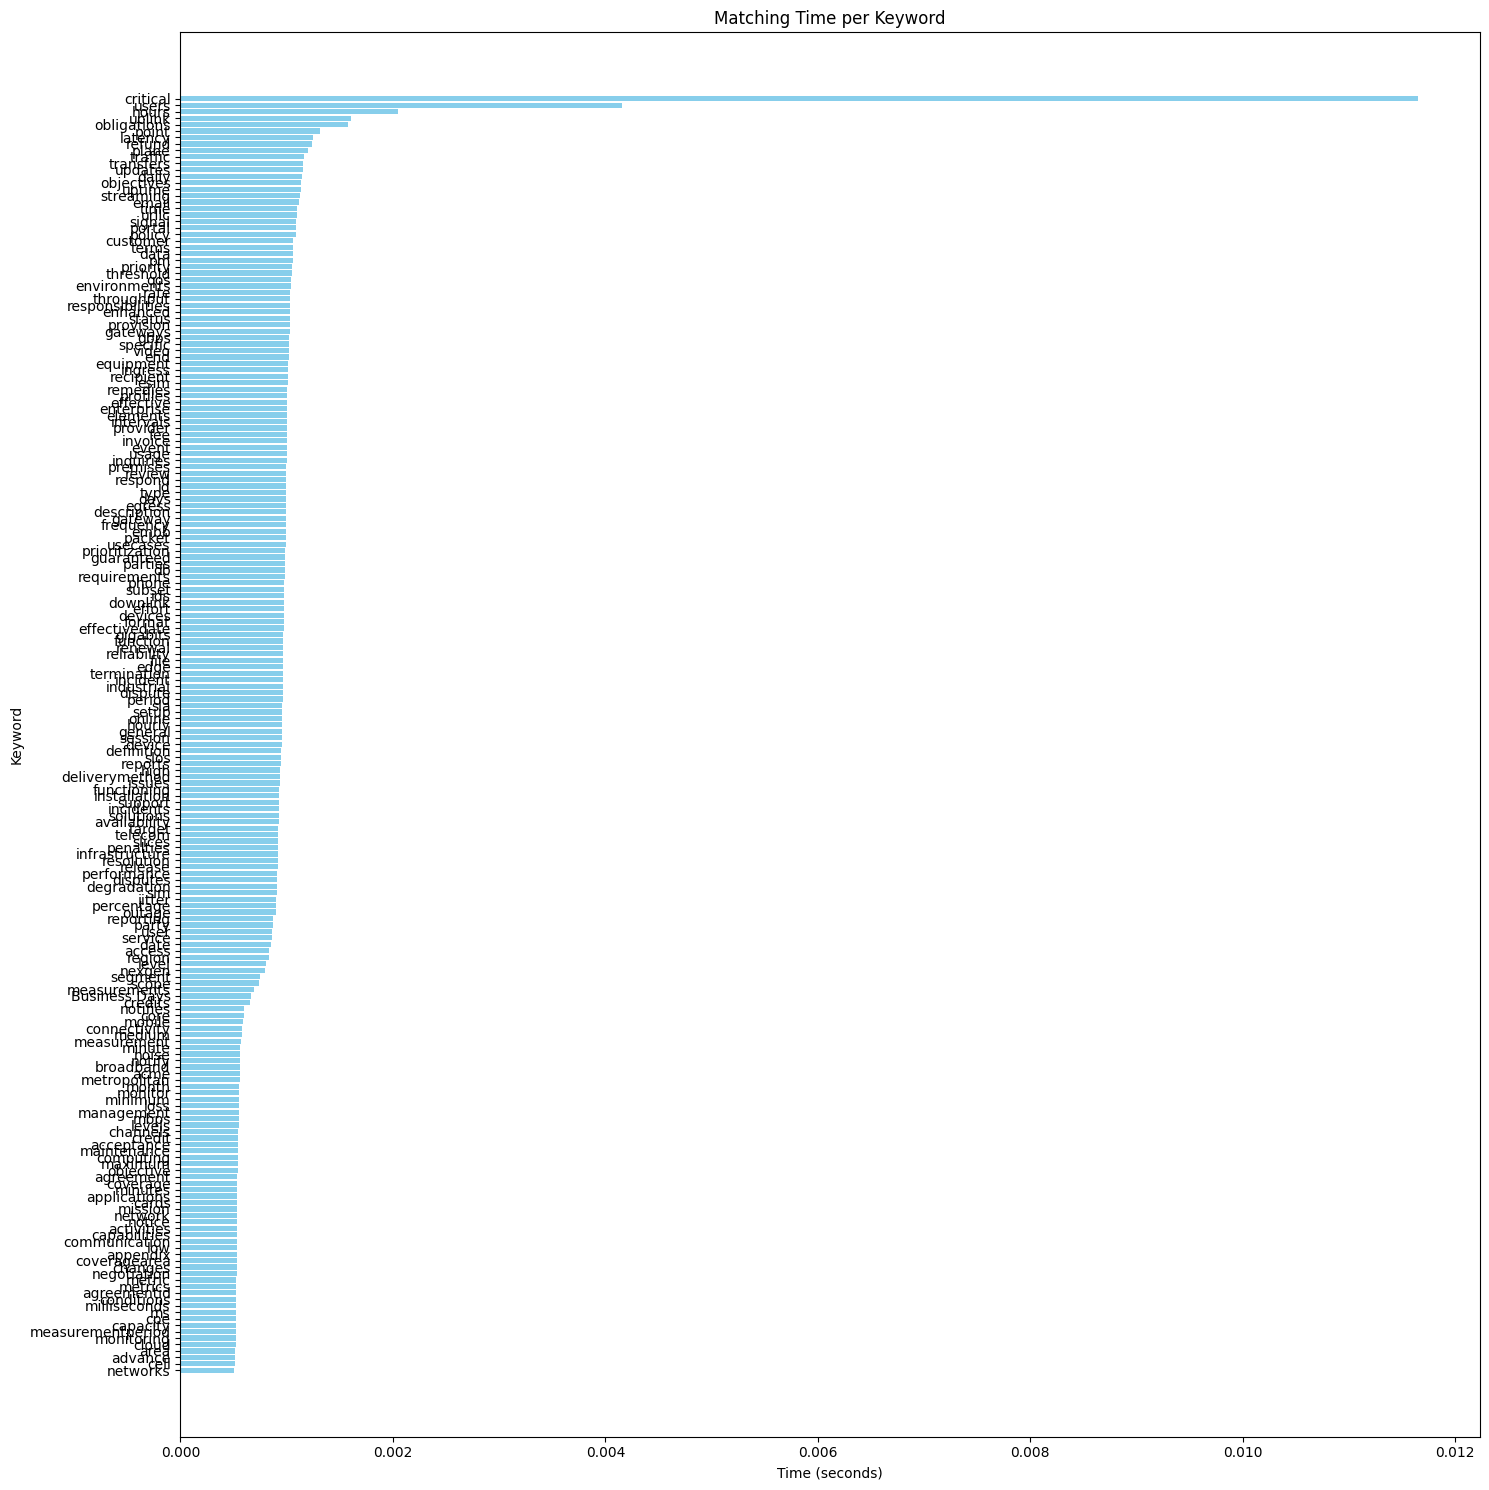

In [ ]:
# Sort by time
timings.sort(key=lambda x: x[1], reverse=True)

# Prepare data
keywords_sorted, times_sorted = zip(*timings)

# Plot
plt.figure(figsize=(15, 15))
plt.barh(keywords_sorted, times_sorted, color="skyblue")
plt.xlabel("Time (seconds)")
plt.ylabel("Keyword")
plt.title("Matching Time per Keyword")
plt.gca().invert_yaxis()  # Show slowest at the top
plt.tight_layout()
plt.show()


In [ ]:
docs = text.split("\n\n")  # Assuming paragraphs are separated by double newlines

total_docs = len(docs)
docs_with_matches = 0

for para in docs:
    doc = nlp(para)
    matches = matcher(doc)
    if matches:
        docs_with_matches += 1

match_rate = (docs_with_matches / total_docs) * 100
print(f"Match Rate: {match_rate:.2f}%")


Match Rate: 100.00%


In [ ]:
import time

total_time = 0.0
# time per match (not per doc), if per doc , set to 0 : match_counts=0
match_counts = len(matches)

for para in docs:
    doc = nlp(para)

    start = time.perf_counter()
    matches = matcher(doc)
    end = time.perf_counter()

    total_time += (end - start)
    match_counts += 1  # or only count if matches found: if matches: match_counts += 1

avg_time_per_match = total_time / match_counts if match_counts > 0 else 0
print(f"Average Time per Match: {avg_time_per_match:.6f} seconds")


Average Time per Match: 0.000415 seconds


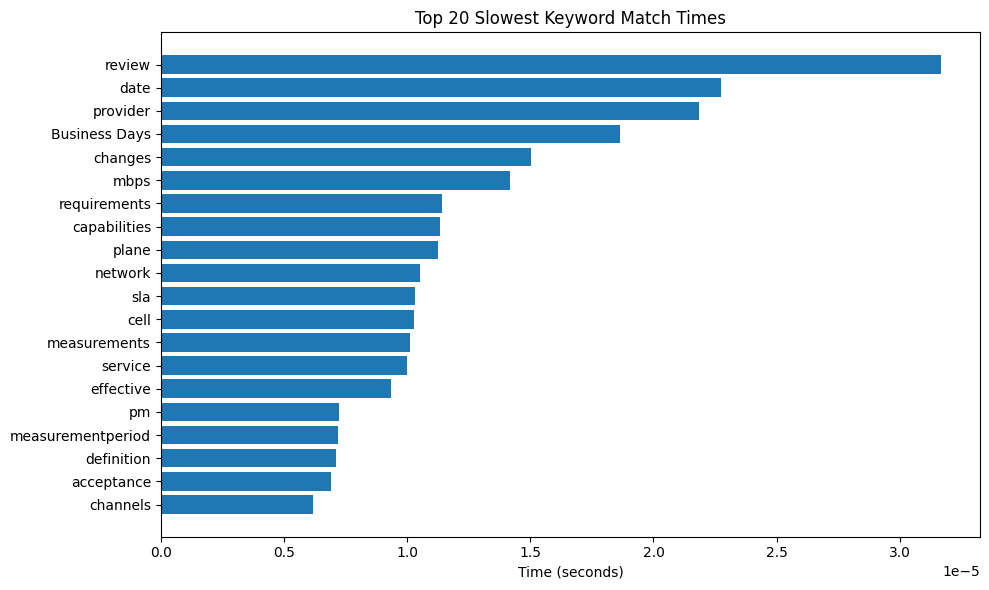

In [ ]:
# Create PhraseMatcher
from spacy.matcher import PhraseMatcher
timings = []
for kw in sorted(keywords):
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
    keyword_doc = nlp.make_doc(kw)
    matcher.add("KEYWORD", [keyword_doc])

    start_time = time.perf_counter()
    matches = matcher(doc)
    elapsed_time = time.perf_counter() - start_time

    timings.append((kw, elapsed_time))

# (Optional) Sort by elapsed time
timings.sort(key=lambda x: x[1], reverse=True)

# (Optional) Plot top 20 slowest
top_k = 20
top_timings = timings[:top_k]
keywords_top = [x[0] for x in top_timings]
times_top = [x[1] for x in top_timings]

plt.figure(figsize=(10, 6))
plt.barh(keywords_top[::-1], times_top[::-1])
plt.xlabel("Time (seconds)")
plt.title(f"Top {top_k} Slowest Keyword Match Times")
plt.tight_layout()
plt.show()

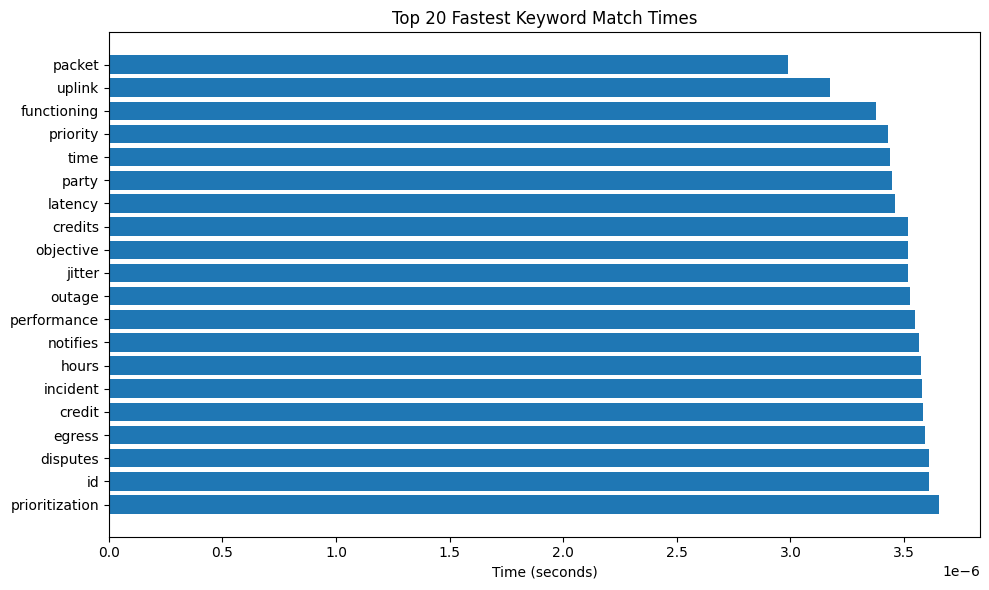

In [ ]:
# Sort timings by elapsed time (ascending = fastest first)
timings.sort(key=lambda x: x[1])  # No reverse

# Get the 20 fastest matches
top_k = 20
fastest_timings = timings[:top_k]
keywords_top = [x[0] for x in fastest_timings]
times_top = [x[1] for x in fastest_timings]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(keywords_top[::-1], times_top[::-1])  # Reverse for top-down plot
plt.xlabel("Time (seconds)")
plt.title(f"Top {top_k} Fastest Keyword Match Times")
plt.tight_layout()
plt.show()

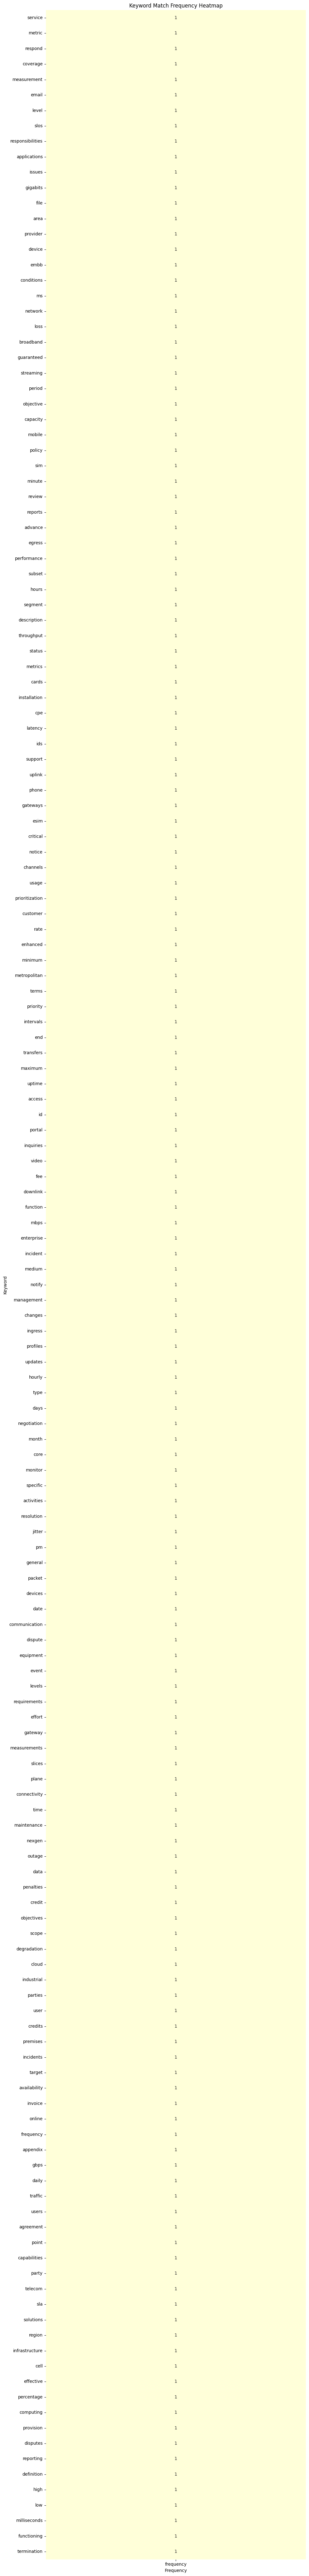

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Count matches per keyword
keyword_counts = Counter(keywords2)

# Make sure the matcher has been defined and doc exists
if 'matcher' in locals() and 'doc' in locals():
    for match_id, start, end in matcher(doc):
        label = nlp.vocab.strings[match_id]
        if label.startswith("KEYWORD_"):
            keyword = label.replace("KEYWORD_", "")
            keyword_counts[keyword] += 1

# Convert to DataFrame
if keyword_counts:
    df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

    plt.figure(figsize=(10, len(df) * 0.5))
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title("Keyword Match Frequency Heatmap")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    plt.tight_layout()
    plt.show()
else:
    print("No keyword matches found. Heatmap not generated.")


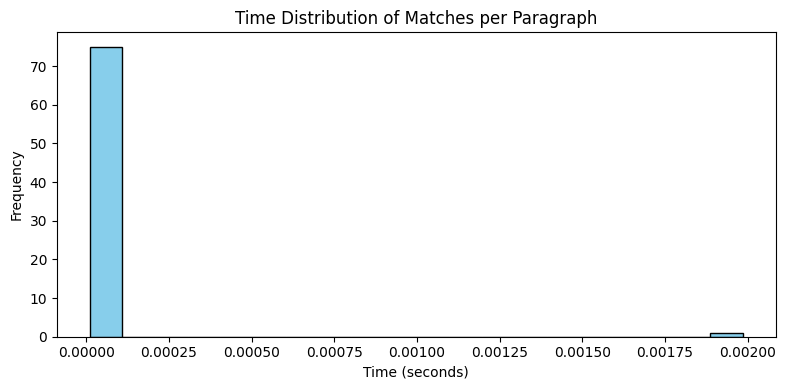

In [ ]:
import time

timings = []

for para in text.split("\n\n"):  # or other sections
    doc = nlp(para)
    start = time.perf_counter()
    matcher(doc)
    end = time.perf_counter()
    timings.append(end - start)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(timings, bins=20, color="skyblue", edgecolor="black")
plt.title("Time Distribution of Matches per Paragraph")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Span Overlap Visualization (with displacy)
# spaCy's built-in displacy visualizer to highlight matched spans

from spacy import displacy

# Get matches and convert to "entities" for displacy
ents = []

for match_id, start, end in matcher(doc):
    label = nlp.vocab.strings[match_id]
    span = doc[start:end]
    ents.append({
        "start": span.start_char,
        "end": span.end_char,
        "label": label.replace("KEYWORD_", "")
    })

# Render visualization
doc_user_data = {"text": doc.text, "ents": ents, "title": None}
displacy.render(doc_user_data, style="ent", manual=True, jupyter=True)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define your sets
ground_truth={ "access", "agreement", "appendix","area", "audit", "availability", "average", "basic", "breach", "broadband", "capabilities", "channels", "communication",
 "computing", "conditions",  "connectivity",  "coverage", "credit",  "critical", "customer",
 "daily",  "data", "date", "days", "definition", "delay", "delivery",  "description",
 "devices", "dispute", "disputes", "downlink", "effective", "effort", "email", "embb", "enhanced",
 "enterprise", "equipment", "esim", "event", "exclusions", "expirationdate", "fault", "faults", "fee", "frequency", "function",
  "functioning", "gateway", "gateways", "gbps", "general", "geographic", "gigabits", "governing", "guaranteed", "helpdesk", "high", "hour", "hourly",
   "hours", "id", "ids", "incident", "incidentresolutiontime", "incidentresponsetime", "incidents", "industrial", "information", "infrastructure",
    "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "jurisdiction", "kpi", "latency", "latencybreach",  "level", "levels",
    "locations", "loss", "maintenance", "management",  "maximum", "mbps", "measurement",
    "measurements", "mediation", "medium", "method", "metric", "metrics", "metropolitan", "milliseconds", "min", "minimum", "minor", "minute", "minutes", "mobile",
    "monitor", "monitoring", "month", "monthly", "months", "ms", "negotiation", "network", "new", "notice", "notification",
    "notify", "objective", "objectives", "online", "packet", "parties", "party", "penalties", "penalty", "percentage", "percentile",
    "performance", "period", "phone", "pm", "point", "policy", "portal", "premises",  "prioritization", "priority",
    "profiles", "provider", "provision", "quarterly",  "rate", "region", "release",
    "reliability", "remedies", "renewal", "report", "requirements", "resolution", "respond", "response", "responsibilities",
    "restoration", "review", "rights", "round","scope", "segment", "service", "servicename", "sim", "slices", "slos", "solutions",
    "specific", "speed", "status", "streaming", "subset", "support", "supporteddevices", "tablets", "target", "telecom",
    "termination", "terminationnoticeperiod", "terms", "tests", "threshold", "throughput", "tiers", "time", "tolerated", "tools", "total",
    "tracking", "traffic", "transfers", "trip", "trt", "type", "updates", "uplink", "uptime", "usage",  "user", "users",
    "workdays", 'activities', 'advance', 'applications', 'cloud', 'core', 'credits', 'degradation', 'outage', 'reporting', 'reports' }



predicted_keywords = keywords2       # from your matcher

# Build the union set of all unique keywords seen
all_keywords = sorted(ground_truth.union(predicted_keywords))

# Create binary vectors
y_true = [1 if kw in ground_truth else 0 for kw in all_keywords]
y_pred = [1 if kw in predicted_keywords else 0 for kw in all_keywords]

# Now compute scores
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9090909090909091
Recall: 0.7211538461538461
F1 Score: 0.8042895442359249


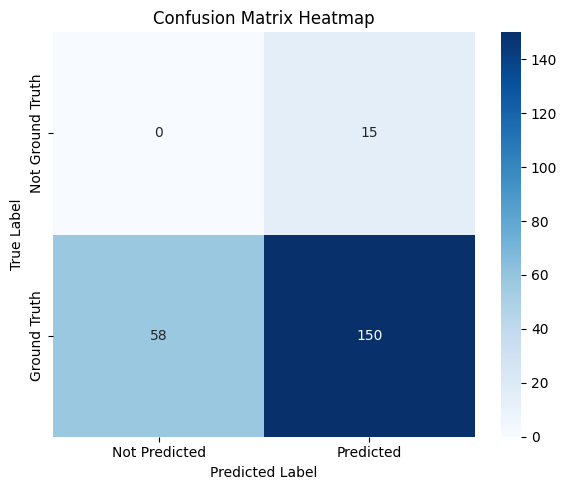

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Predicted', 'Predicted'],
            yticklabels=['Not Ground Truth', 'Ground Truth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


In [62]:
# Build the union set of all unique keywords seen
all_keywords = sorted(ground_truth.union(predicted_keywords))

# Create binary vectors
y_true = [1 if kw in ground_truth else 0 for kw in all_keywords]
y_pred = [1 if kw in predicted_keywords else 0 for kw in all_keywords]

# Now compute scores
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Categorize keywords
true_positives = []
false_negatives = []
false_positives = []
true_negatives = []

for kw, yt, yp in zip(all_keywords, y_true, y_pred):
    if yt == 1 and yp == 1:
        true_positives.append(kw)
    elif yt == 1 and yp == 0:
        false_negatives.append(kw)
    elif yt == 0 and yp == 1:
        false_positives.append(kw)
    elif yt == 0 and yp == 0:
        true_negatives.append(kw)

# Print results
print("\n✅ True Positives (Predicted Ground Truth):")
print(true_positives)

print("\n❌ False Negatives (Missed Ground Truth):")
print(false_negatives)

print("\n⚠️  False Positives (Predicted but not in Ground Truth):")
print(false_positives)

print("\n✔️  True Negatives (Correctly Ignored):")
print(true_negatives)


Precision: 0.9090909090909091
Recall: 0.7211538461538461
F1 Score: 0.8042895442359249

✅ True Positives (Predicted Ground Truth):
['access', 'activities', 'advance', 'agreement', 'appendix', 'applications', 'area', 'availability', 'broadband', 'capabilities', 'channels', 'cloud', 'communication', 'computing', 'conditions', 'connectivity', 'core', 'coverage', 'credit', 'credits', 'critical', 'customer', 'daily', 'data', 'date', 'days', 'definition', 'degradation', 'description', 'devices', 'dispute', 'disputes', 'downlink', 'effective', 'effort', 'email', 'embb', 'enhanced', 'enterprise', 'equipment', 'esim', 'event', 'fee', 'frequency', 'function', 'functioning', 'gateway', 'gateways', 'gbps', 'general', 'gigabits', 'guaranteed', 'high', 'hourly', 'hours', 'id', 'ids', 'incident', 'incidents', 'industrial', 'infrastructure', 'inquiries', 'installation', 'intervals', 'invoice', 'issues', 'jitter', 'latency', 'level', 'levels', 'loss', 'maintenance', 'management', 'maximum', 'mbps', 'mea

# **large English NLP model provided by spaCy**

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from google.colab import files

# Load the large English model with word vectors
nlp = spacy.load("en_core_web_lg")


# Step 3: Read the SLA text file
with open("geminiSLA.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Step 4: Process the text using spaCy
doc = nlp(text)


# SLA-related keywords to compare against

keywords={ "Business Days", "acceptance", "access", "acme", "activities", "advance", "agreement", "agreementid", "amendment", "amendments", "anniversary", "appendix", "applications", "area", "auto", "availability", "availabilitybreach", "average", "b", "broadband", "capabilities", "capacity", "cards", "cell", "cells", "changes", "channels", "cloud", "communication", "computing", "conditions", "connectivity", "contact", "core", "corp", "coverage", "coveragearea", "cpe", "credit", "credits", "critical", "customer", "customercontact", "daily", "data", "date", "day", "days", "db", "definition", "degradation", "deliverymethod", "description", "device", "devices", "dispute", "disputes", "downlink", "edge", "effective", "effectivedate", "effort", "egress", "elements", "email", "embb", "end", "enhanced", "enterprise", "environments", "equipment", "esim", "event", "expirationdate", "f", "faith", "fault", "fee", "file", "format", "frequency", "function", "functioning", "g", "gateway", "gateways", "gbps", "general", "geographic", "gigabits", "guaranteed", "handover", "high", "hourly", "hours", "id", "ids", "incident", "incidentresolutiontime", "incidentresponsetime", "incidents", "industrial", "information", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "iot", "issues", "jitter", "latency", "latencybreach", "level", "levels", "loss", "low", "m", "maintenance", "management", "maps", "master", "maximum", "mbps", "measurement", "measurementperiod", "measurements", "mediation", "medium", "metric", "metrics", "metropolitan", "milliseconds", "minimum", "minute", "minutes", "mission", "mobile", "monitor", "monitoring", "month", "ms", "negotiation", "network", "networks", "nexgen", "nextgen", "noc", "noise", "notice", "notifies", "notify", "objective", "objectives", "obligations", "online", "outage", "packet", "parties", "parts", "party", "pdf", "peak", "penalties", "percentage", "performance", "period", "phone", "plane", "pm", "point", "policy", "portal", "premises", "prioritization", "priority", "profiles", "provider", "providersupportemail", "provision", "qos", "rate", "ratio", "recipient", "refund", "region", "release", "reliability", "remedies", "renewal", "reporting", "reports", "requests", "requirements", "resolution", "respond", "responsibilities", "restoration", "review", "round", "rtt", "sample", "scope", "segment", "service", "servicename", "services", "session", "setup", "signal", "sim", "sla", "slices", "slos", "smartphones", "snr", "solutions", "specific", "status", "streaming", "subset", "support", "supporteddevices", "tablets", "target", "telecom", "termination", "terminationnoticeperiod", "terms", "threshold", "throughput", "time", "tolerated", "tracking", "traffic", "transfers", "trip", "trt", "type", "updates", "upf", "uplink", "uptime", "urllc", "usage", "usecases", "user", "users", "video", "windows", "writing", "x", "xxxx", "zone", "zones" }

# Convert keywords to spaCy tokens (handle phrases properly)
keyword_tokens = {kw: nlp(kw)[0] if len(nlp(kw)) == 1 else nlp(kw) for kw in keywords}


# Compare each token in the doc to each keyword
for token in doc:
    if token.has_vector:
        for kw, kw_token in keyword_tokens.items():
            if isinstance(kw_token, spacy.tokens.Token):
                # Single-word keyword
                similarity = token.similarity(kw_token)
            else:
                # Multi-word keyword (e.g., "Business Days") — average similarity
                similarity = sum(token.similarity(t) for t in kw_token) / len(kw_token)

            if similarity > 0.6:
                print(f"Doc token '{token.text}' is similar to keyword '{kw}' (Similarity: {similarity:.2f})")


/tmp/ipython-input-24-982793031.py:30: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity = token.similarity(kw_token)


Doc token 'Service' is similar to keyword 'services' (Similarity: 0.85)
Doc token 'Service' is similar to keyword 'service' (Similarity: 1.00)
Doc token 'Service' is similar to keyword 'customer' (Similarity: 0.67)
Doc token 'Service' is similar to keyword 'provider' (Similarity: 0.66)
Doc token 'Level' is similar to keyword 'level' (Similarity: 1.00)
Doc token 'Level' is similar to keyword 'levels' (Similarity: 0.85)
Doc token 'Level' is similar to keyword 'high' (Similarity: 0.60)
Doc token 'Agreement' is similar to keyword 'negotiation' (Similarity: 0.60)
Doc token 'Agreement' is similar to keyword 'dispute' (Similarity: 0.65)
Doc token 'Agreement' is similar to keyword 'agreement' (Similarity: 1.00)
Doc token 'SLA' is similar to keyword 'sla' (Similarity: 1.00)
Doc token 'G' is similar to keyword 'g' (Similarity: 1.00)
Doc token 'Enhanced' is similar to keyword 'capabilities' (Similarity: 0.63)
Doc token 'Enhanced' is similar to keyword 'enhanced' (Similarity: 1.00)
Doc token 'Mobi